<a href="https://colab.research.google.com/github/jun-wei-lin/NCHU/blob/main/Digital-Image-%20Processing/Hw2_%E9%8A%B3%E5%8C%96%E8%99%95%E7%90%86/Hw2_Unsharp_Masking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [138]:
# 安裝必要的工具
!pip install opencv-python-headless matplotlib

# 載入所需套件
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

In [139]:
# 定義函數來顯示影像
def show_images(images, titles, cmap=None):
    plt.figure(figsize=(12, 8))
    for i, image in enumerate(images):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(image, cmap=cmap if cmap else 'gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [140]:
def read_image_from_url(url):
    # 使用 urllib 從網址讀取影像
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    img = cv2.imdecode(image, cv2.IMREAD_COLOR)
    #轉換成灰階圖像
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #轉換成彩色圖像
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img_gray, img_rgb


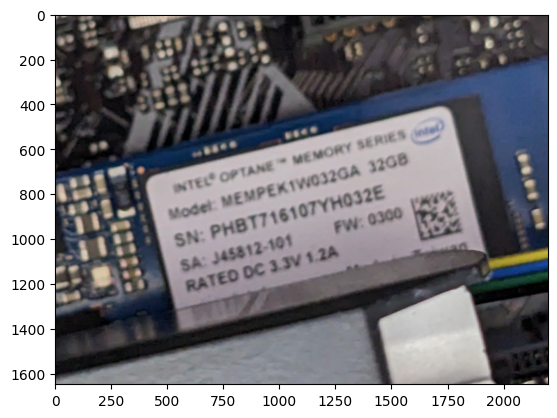

In [141]:
# 使用我github的影像URL
source_url = "https://raw.githubusercontent.com/jun-wei-lin/NCHU/refs/heads/main/Digital-Image-%20Processing/img21.jpg"
#測試用萊娜圖
#source_url = "https://raw.githubusercontent.com/nicktien007/Nick.NCHU.DIP/refs/heads/main/output/Unsharp_source_screenshot_01.01.2021.png"

# 讀取影像
gray_img, source_image = read_image_from_url(source_url)

plt.imshow(source_image)


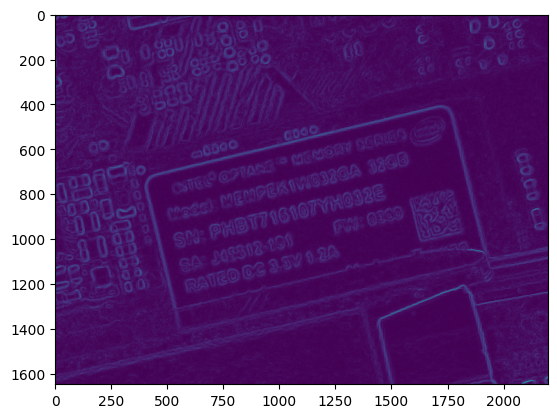

In [142]:
# Sobel Operator (一階微分)
sobel_x = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=3)  # 水平梯度
sobel_y = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=3)  # 垂直梯度
diff_1_img = cv2.magnitude(sobel_x, sobel_y)  # 合併梯度

plt.imshow(diff_1_img)

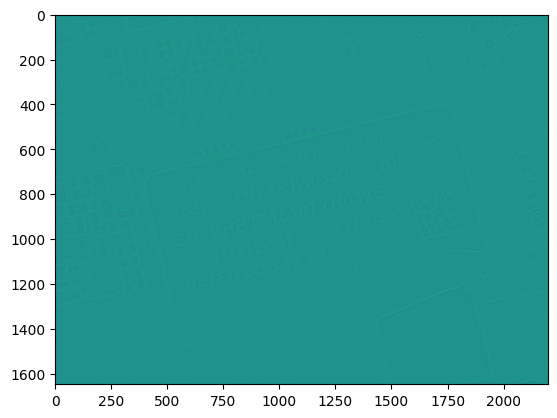

In [143]:
# Laplace Operator (二階微分)
diff_2_img = cv2.Laplacian(gray_img, cv2.CV_64F, ksize=3)
plt.imshow(diff_2_img)

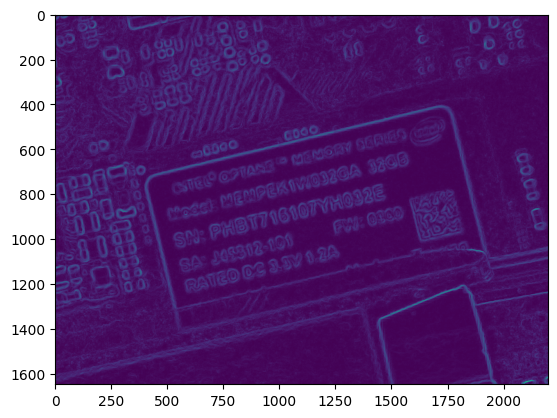

In [144]:
# 算術平均濾波 (Mean Filter)
kernel = np.ones((3, 3), np.float32) / 9
mean_img = cv2.filter2D(diff_1_img, -1, kernel)

#正規化
#mean_img = cv2.normalize(mean_img, None, 0, 1, cv2.NORM_MINMAX)
plt.imshow(mean_img)

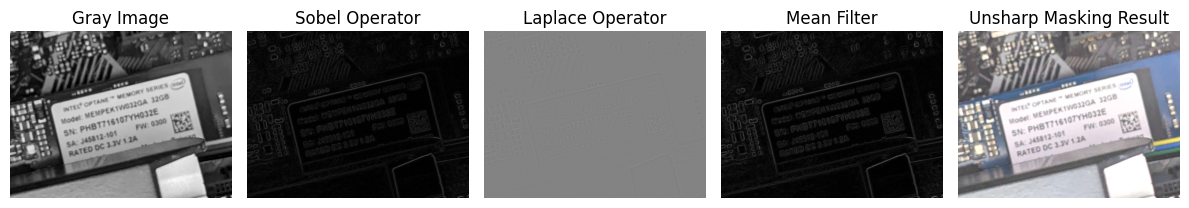

In [145]:
# 將 diff_2_img 與 mean_img 相乘
e = diff_2_img * (mean_img / 255)
# 縮放到有效範圍 [0, 255]
e_scaled = cv2.normalize(e, None, 0, 255, cv2.NORM_MINMAX)


#不縮放細節
# 將 diff_2_img 與 mean_img 相乘
#e = diff_2_img * mean_img

# 將 e  正規化到 0-255
#e_scaled = cv2.normalize(e, None, 0, 255, cv2.NORM_MINMAX)

# 將 e_scaled 擴展為與原始影像相同的通道數
e_scaled_color = cv2.merge([e_scaled] * 3)  # 將灰階影像轉換為 3 通道影像


# 將原始影像與 e_scaled_color 結合進行 Enhancement
enhanced_image = cv2.addWeighted(source_image.astype(np.float32), 1.0,
                                 e_scaled_color.astype(np.float32), 0.5, 0)

# 將結果轉換回 uint8 格式
#enhanced_image = cv2.convertScaleAbs(enhanced_image)

# 限制範圍並轉換為 uint8
enhanced_image = np.clip(enhanced_image, 0, 255).astype(np.uint8)


# 顯示影像結果
show_images(
    [gray_img, diff_1_img, diff_2_img, mean_img, enhanced_image],
    ['Gray Image', 'Sobel Operator', 'Laplace Operator', 'Mean Filter', 'Unsharp Masking Result']
)


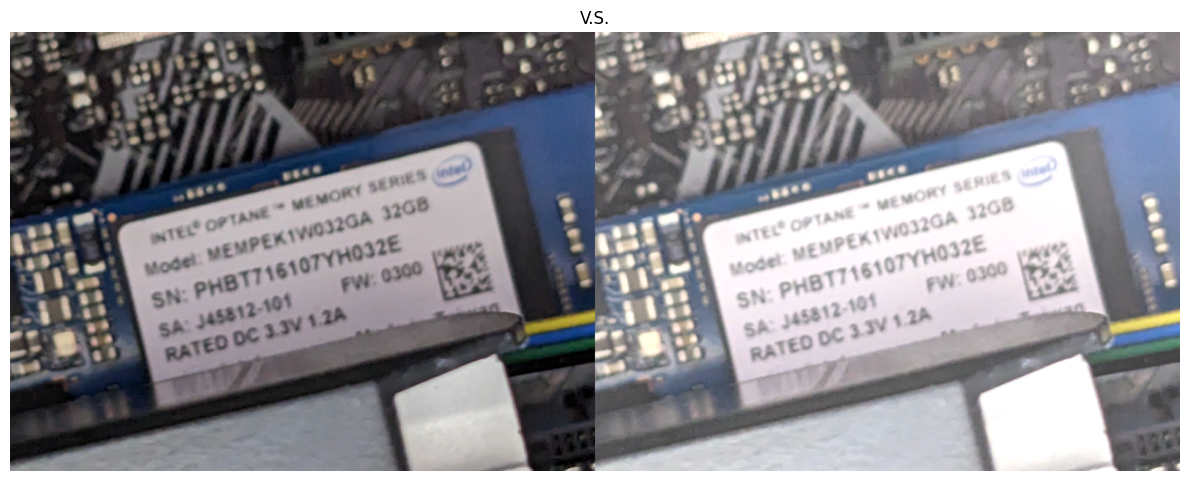

In [146]:
total_kp = np.concatenate((source_image, enhanced_image), axis=1)
show_images([total_kp],['V.S.'])